# DATA PREPARATION

In [14]:
from os.path import join
from os import listdir
import xml.etree.ElementTree as ET
from os.path import splitext

PATH = './resources'
OUTPUT = './output'

CHAINS_DIR = 'Chains'
NS = {'Aux': 'http://www.abbyy.com/ns/Aux#',
      'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#'}

XML_PATH = join(PATH, CHAINS_DIR)
CHAINS_PATH = join(OUTPUT, CHAINS_DIR)

In [15]:
# extract original text from xml content
def extract_text(xml_content):
    root = ET.fromstring(xml_content)
    text_ann = root.find('Aux:TextAnnotations', NS)
    doc_text = text_ann.find('Aux:document_text', NS)
    if doc_text is not None:
        return doc_text.text
    else:
        return ''

In [41]:
# build data frame row
def build_row(mention_1, mention_2, start_1, start_2, len_1, len_2, text_len, are_from_same_group,
              chains_filename):
    men_1_lower = mention_1.lower()
    men_2_lower = mention_2.lower()
    row = {}
    row['Equality'] = int(men_1_lower == men_2_lower)
    row['M1ContainsM2'] = int(men_1_lower in men_2_lower)
    row['M2ContainsM1'] = int(men_2_lower in men_1_lower)
    row['Distance'] = start_2 - (start_1 + len_1)
    row['RelativeDistance'] = row['Distance'] / text_len
    row['Mention1'] = mention_1
    row['Mention2'] = mention_2
    row['Mention1Id'] = (start_1, len_1)
    row['Mention2Id'] = (start_2, len_2)
    row['SameGroup'] = int(are_from_same_group)
    row['ChainsFilename'] = chains_filename
    return row

In [42]:
rows_list = []
for filename in listdir(XML_PATH):
    with open(join(XML_PATH, filename)) as f:
        xml_content = f.read()
    text = extract_text(xml_content)
    text_len = len(text)
    print(f'Filename - {filename} ; length - {text_len}')
    if text_len > 0:
        chains_entries = []
        chains_filename = splitext(filename)[0] + '.txt'
        with open(join(CHAINS_PATH, chains_filename)) as f:
            for line in f:
                chains_entries.append(tuple(map(lambda x: int(x),line.strip().split(' '))))
        count = 0
        chains_entries_len = len(chains_entries)
        for i in range(chains_entries_len):
            _, start_i, len_i, chain_i = chains_entries[i]
            men_i = text[start_i:start_i+len_i]
            for j in range(i+1, chains_entries_len):
                _, start_j, len_j, chain_j = chains_entries[j]
                men_j = text[start_j:start_j+len_j]
                row = build_row(men_i, men_j, start_i, start_j, len_i, len_j, text_len, chain_i == chain_j,
                                chains_filename)
                rows_list.append(row)
                count += 1
        print(f'Number of chains entries - {len(chains_entries)} ; Number of mention pairs - {count}')
    else:
        print('No chains: text is empty.')
    print()

Filename - book_1043_from_open_corpora_2 _ Legacy.xml ; length - 697
Number of chains entries - 8 ; Number of mention pairs - 28

Filename - book_2568_from_open_corpora_2 _ Legacy.xml ; length - 817
Number of chains entries - 6 ; Number of mention pairs - 15

Filename - book_78_from_open_corpora_2 _ Legacy.xml ; length - 1474
Number of chains entries - 37 ; Number of mention pairs - 666

Filename - book_50_from_open_corpora_2 _ Legacy.xml ; length - 21933
Number of chains entries - 347 ; Number of mention pairs - 60031

Filename - book_3361_from_open_corpora_2 _ Legacy.xml ; length - 6885
Number of chains entries - 115 ; Number of mention pairs - 6555

Filename - book_2958_from_open_corpora_2 _ Legacy.xml ; length - 782
Number of chains entries - 15 ; Number of mention pairs - 105

Filename - book_2696_from_open_corpora_2 _ Legacy.xml ; length - 689
Number of chains entries - 10 ; Number of mention pairs - 45

Filename - book_2349_from_open_corpora_2 _ Legacy.xml ; length - 159
Number 

Number of chains entries - 127 ; Number of mention pairs - 8001

Filename - book_2146_from_open_corpora_2 _ Legacy.xml ; length - 4889
Number of chains entries - 110 ; Number of mention pairs - 5995

Filename - book_1259_from_open_corpora_2 _ Legacy.xml ; length - 8107
Number of chains entries - 90 ; Number of mention pairs - 4005

Filename - book_2585_from_open_corpora_2 _ Legacy.xml ; length - 177
Number of chains entries - 0 ; Number of mention pairs - 0

Filename - book_2770_from_open_corpora_2 _ Legacy.xml ; length - 1285
Number of chains entries - 21 ; Number of mention pairs - 210

Filename - book_46_from_open_corpora_2 _ Legacy.xml ; length - 8380
Number of chains entries - 105 ; Number of mention pairs - 5460

Filename - book_1898_from_open_corpora_2 _ Legacy.xml ; length - 915
Number of chains entries - 16 ; Number of mention pairs - 120

Filename - book_1371_from_open_corpora_2 _ Legacy.xml ; length - 237
Number of chains entries - 0 ; Number of mention pairs - 0

Filename -

Number of chains entries - 130 ; Number of mention pairs - 8385

Filename - book_1096_from_open_corpora_2 _ Legacy.xml ; length - 1648
Number of chains entries - 36 ; Number of mention pairs - 630

Filename - book_3893_from_open_corpora_2 _ Legacy.xml ; length - 2269
Number of chains entries - 41 ; Number of mention pairs - 820

Filename - book_2108_from_open_corpora_2 _ Legacy.xml ; length - 203
Number of chains entries - 4 ; Number of mention pairs - 6

Filename - book_239_from_open_corpora_2 _ Legacy.xml ; length - 3519
Number of chains entries - 49 ; Number of mention pairs - 1176

Filename - book_3396_from_open_corpora_2 _ Legacy.xml ; length - 2924
Number of chains entries - 35 ; Number of mention pairs - 595

Filename - book_2214_from_open_corpora_2 _ Legacy.xml ; length - 1623
Number of chains entries - 31 ; Number of mention pairs - 465

Filename - book_1085_from_open_corpora_2 _ Legacy.xml ; length - 1600
Number of chains entries - 13 ; Number of mention pairs - 78

Filename 

Filename - book_1398_from_open_corpora_2 _ Legacy.xml ; length - 1203
Number of chains entries - 26 ; Number of mention pairs - 325

Filename - book_3085_from_open_corpora_2 _ Legacy.xml ; length - 1501
Number of chains entries - 34 ; Number of mention pairs - 561

Filename - book_2569_from_open_corpora_2 _ Legacy.xml ; length - 1256
Number of chains entries - 12 ; Number of mention pairs - 66

Filename - book_541_from_open_corpora_2 _ Legacy.xml ; length - 1757
Number of chains entries - 45 ; Number of mention pairs - 990

Filename - book_3655_from_open_corpora_2 _ Legacy.xml ; length - 1813
Number of chains entries - 37 ; Number of mention pairs - 666

Filename - book_1527_from_open_corpora_2 _ Legacy.xml ; length - 1842
Number of chains entries - 33 ; Number of mention pairs - 528

Filename - book_2015_from_open_corpora_2 _ Legacy.xml ; length - 461
Number of chains entries - 8 ; Number of mention pairs - 28

Filename - book_1528_from_open_corpora_2 _ Legacy.xml ; length - 1329
Numb

Number of chains entries - 455 ; Number of mention pairs - 103285

Filename - book_297_from_open_corpora_2 _ Legacy.xml ; length - 1604
Number of chains entries - 26 ; Number of mention pairs - 325

Filename - book_852_from_open_corpora_2 _ Legacy.xml ; length - 845
Number of chains entries - 10 ; Number of mention pairs - 45

Filename - book_1132_from_open_corpora_2 _ Legacy.xml ; length - 1265
Number of chains entries - 11 ; Number of mention pairs - 55

Filename - book_2891_from_open_corpora_2 _ Legacy.xml ; length - 5575
Number of chains entries - 120 ; Number of mention pairs - 7140

Filename - book_296_from_open_corpora_2 _ Legacy.xml ; length - 1152
Number of chains entries - 13 ; Number of mention pairs - 78

Filename - book_3617_from_open_corpora_2 _ Legacy.xml ; length - 2138
Number of chains entries - 33 ; Number of mention pairs - 528

Filename - book_1946_from_open_corpora_2 _ Legacy.xml ; length - 1956
Number of chains entries - 43 ; Number of mention pairs - 903

Filenam

Filename - book_1744_from_open_corpora_2 _ Legacy.xml ; length - 1351
Number of chains entries - 31 ; Number of mention pairs - 465

Filename - book_1516_from_open_corpora_2 _ Legacy.xml ; length - 1063
Number of chains entries - 23 ; Number of mention pairs - 253

Filename - book_946_from_open_corpora_2 _ Legacy.xml ; length - 1132
Number of chains entries - 25 ; Number of mention pairs - 300

Filename - book_1531_from_open_corpora_2 _ Legacy.xml ; length - 1091
Number of chains entries - 14 ; Number of mention pairs - 91

Filename - book_1214_from_open_corpora_2 _ Legacy.xml ; length - 686
Number of chains entries - 13 ; Number of mention pairs - 78

Filename - book_1711_from_open_corpora_2 _ Legacy.xml ; length - 114
Number of chains entries - 0 ; Number of mention pairs - 0

Filename - book_1172_from_open_corpora_2 _ Legacy.xml ; length - 1477
Number of chains entries - 18 ; Number of mention pairs - 153

Filename - book_1562_from_open_corpora_2 _ Legacy.xml ; length - 1179
Number 

In [43]:
import pandas as pd
df = pd.DataFrame(rows_list)
df.head()

,ChainsFilename,Distance,Equality,M1ContainsM2,M2ContainsM1,Mention1,Mention1Id,Mention2,Mention2Id,RelativeDistance,SameGroup
0,book_1043_from_open_corpora_2 _ Legacy.txt,87,0,0,0,России,"(14, 6)",Россия,"(107, 6)",0.124821,1
1,book_1043_from_open_corpora_2 _ Legacy.txt,110,0,0,0,России,"(14, 6)",Рамочной конвенции Всемирной организации здрав...,"(130, 80)",0.157819,0
2,book_1043_from_open_corpora_2 _ Legacy.txt,428,0,0,0,России,"(14, 6)",Спикер Госдумы Борис Грызлов,"(448, 28)",0.614060,0
3,book_1043_from_open_corpora_2 _ Legacy.txt,435,0,0,0,России,"(14, 6)",Госдумы,"(455, 7)",0.624103,0
4,book_1043_from_open_corpora_2 _ Legacy.txt,459,0,0,0,России,"(14, 6)",Я,"(479, 1)",0.658537,0


In [44]:
features = ['Distance', 'Equality', 'M1ContainsM2', 'M2ContainsM1', 'RelativeDistance']
target = 'SameGroup'

X = df.loc[:, features]
y = df.loc[:, target]

In [45]:
# Split the data set and create two data sets.
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)
print("Number of training records: " + str(X_train.shape[0]))
print("Number of testing records : " + str(X_test.shape[0]))

Number of training records: 1234381
Number of testing records : 308596


# CLASSIFICATION MODEL

In [23]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Model with Default Parameters

In [22]:
model = XGBClassifier()

NameError: name 'XGBClassifier' is not defined

In [84]:
# Train and evaluate.
model.fit(X_train, y_train,
          eval_metric=['error'],
          eval_set=[((X_train, y_train)),(X_test, y_test)],
          early_stopping_rounds=50,
          verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
from matplotlib import pyplot

%matplotlib inline

Text(0.5, 0, 'Number of iterations')

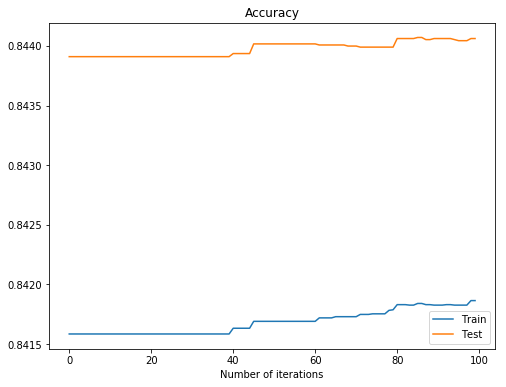

In [87]:
# Plot and display the performance evaluation
xgb_eval = model.evals_result()
eval_steps = range(len(xgb_eval['validation_0']['error']))

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [88]:
print("Model best validation score :", model.best_score)
print("Model best number of tree limit :", model.best_ntree_limit)

Model best validation score : 0.155929
Model best number of tree limit : 86


In [89]:
# Check the accuracy of the trained model.
n_trees = 86
y_pred = model.predict(X_test, ntree_limit= n_trees)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.1f%%" % (accuracy * 100.0))

Accuracy: 84.4%


Text(0, 0.5, 'Feature Importance Score')

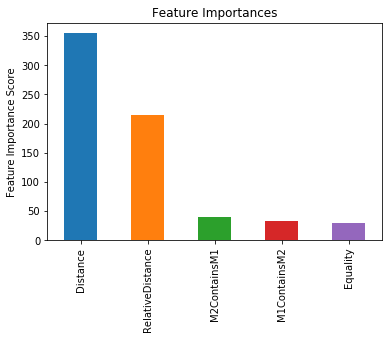

In [90]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Parameters Tuning

### max_depth and min_child_weight

In [102]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
model1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=86,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch1 = GridSearchCV(estimator = model1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
pd.DataFrame(gsearch1.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,42.735860,"{'max_depth': 3, 'min_child_weight': 1}",0.843098,0.836516
1,40.920039,"{'max_depth': 3, 'min_child_weight': 3}",0.843087,0.836856
2,40.881011,"{'max_depth': 3, 'min_child_weight': 5}",0.843113,0.836611
3,65.062265,"{'max_depth': 5, 'min_child_weight': 1}",0.844248,0.814124
4,67.289868,"{'max_depth': 5, 'min_child_weight': 3}",0.844144,0.812463
5,65.683267,"{'max_depth': 5, 'min_child_weight': 5}",0.844135,0.814507
6,92.978738,"{'max_depth': 7, 'min_child_weight': 1}",0.846033,0.796203
7,96.238243,"{'max_depth': 7, 'min_child_weight': 3}",0.846040,0.798112
8,93.374431,"{'max_depth': 7, 'min_child_weight': 5}",0.845783,0.802654
9,121.490772,"{'max_depth': 9, 'min_child_weight': 1}",0.848214,0.771433


In [103]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8368561539745535)

### gamma

In [104]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
model2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=86,
        max_depth=3,
        min_child_weight=3,
        gamma=0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch2 = GridSearchCV(estimator = model2, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
pd.DataFrame(gsearch2.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,41.250088,{'gamma': 0.0},0.843087,0.836856
1,42.576552,{'gamma': 0.1},0.843084,0.836561
2,40.915431,{'gamma': 0.2},0.843099,0.836510
3,41.575056,{'gamma': 0.3},0.843131,0.836290
4,35.467944,{'gamma': 0.4},0.843118,0.836274


In [109]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.8368561539745535)

### subsample and colsample_bytree

In [107]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
model3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=86,
        max_depth=3,
        min_child_weight=3,
        gamma=0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch3 = GridSearchCV(estimator = model3, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
pd.DataFrame(gsearch3.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,40.470679,"{'colsample_bytree': 0.6, 'subsample': 0.6}",0.842734,0.839183
1,41.392617,"{'colsample_bytree': 0.6, 'subsample': 0.7}",0.842752,0.838998
2,39.552601,"{'colsample_bytree': 0.6, 'subsample': 0.8}",0.842722,0.839328
3,40.632847,"{'colsample_bytree': 0.6, 'subsample': 0.9}",0.842762,0.839312
4,39.605746,"{'colsample_bytree': 0.7, 'subsample': 0.6}",0.842734,0.839183
5,40.420311,"{'colsample_bytree': 0.7, 'subsample': 0.7}",0.842752,0.838998
6,40.678979,"{'colsample_bytree': 0.7, 'subsample': 0.8}",0.842722,0.839328
7,39.754985,"{'colsample_bytree': 0.7, 'subsample': 0.9}",0.842762,0.839312
8,43.186412,"{'colsample_bytree': 0.8, 'subsample': 0.6}",0.843041,0.830978
9,41.973216,"{'colsample_bytree': 0.8, 'subsample': 0.7}",0.843111,0.836318


In [110]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.8393281588286079)

## Model with Tuned Parameters

In [46]:
model_final = XGBClassifier(
        learning_rate =0.05, # reduce learning rate
        n_estimators=1000, # add more trees
        max_depth=3,
        min_child_weight=3,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )

In [47]:
model_final.fit(X_train, y_train,
                eval_metric=['error'],
                eval_set=[((X_train, y_train)),(X_test, y_test)],
                early_stopping_rounds=300,
                verbose=False)

print("Model best validation score :", model_final.best_score)
print("Model best number of tree limit :", model_final.best_ntree_limit)

Model best validation score : 0.079645
Model best number of tree limit : 749


In [48]:
n_trees = 998
y_pred = model_final.predict(X_test, ntree_limit= n_trees)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.1f%%" % (accuracy * 100.0))

Accuracy: 92.0%


In [49]:
import pickle

pickle.dump(model_final, open('classifier.pickle.dat', 'wb'))

# loaded_model = pickle.load(open('classifier.pickle.dat', 'rb'))

In [53]:
y_test_df = pd.DataFrame(y_test)
y_test_df['PredictionResult'] = y_pred
test_df_merged = y_test_df.join(df.loc[:, ['Mention1Id', 'Mention2Id', 'ChainsFilename']])

In [54]:
test_df_merged.head()

,SameGroup,PredictionResult,Mention1Id,Mention2Id,ChainsFilename
274619,0,0,"(9579, 3)","(19649, 3)",book_2309_from_open_corpora_2 _ Legacy.txt
443783,1,0,"(2024, 3)","(9640, 3)",book_3538_from_open_corpora_2 _ Legacy.txt
864794,0,0,"(4255, 5)","(7568, 6)",book_275_from_open_corpora_2 _ Legacy.txt
3523,0,0,"(568, 41)","(4583, 3)",book_50_from_open_corpora_2 _ Legacy.txt
1353288,0,0,"(2057, 14)","(4928, 8)",book_31_from_open_corpora_2 _ Legacy.txt


In [56]:
test_df_merged.to_csv('classifier-output.csv', index=False)